# Class 8: Pandas 
Pandas is one of the most popular packages on Python. A powerful feature of pandas is the ability to filter, design, and load relational dataset. The main Pandas’ data structure is DataFrame (DF). Using DF’s you can easily manipulate data in format of rows and columns. 

Some of Pandas most powerful things are: dealing with missing data, convert data formats, joining and merging multiple tables, filtering and reshaping data. We will go through some of the important elements today. I recommend getting the O’Reilly book on Pandas named “Python for Data Analysis”, which was written by Wes McKinney the creator of Pandas. The book's 2nd edition is a good reference to many Pandas commands. Having said that, as I said before, there are a lot of resources available online too.  



Today’s examples will be partially inspired by this book. 

## Importing Packages 
As we’ve seen last week we always need to import the package we need to work with before we write the code. That is why it is a common role in Jupyter is to load packages at the beginning of the notebook. Pandas are loaded using this line of code: “import pandas as pd”. So whenever you see “pd” in the code that refers to Pandas. 

In [1]:
import pandas as pd ## <--Pandas 
import numpy as np
import matplotlib
%matplotlib inline

### Data Frames: 
Are a representation of a table. DF’s are very similar to spreadsheets in excel or csv’s in which the data is presented in columns and rows. In most cases, data frames are two-dimensional representation of data. 

- Let's create a DataFrame:


In [2]:
# "data" is our new DataFrame 

data = pd.DataFrame({'State':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
                    'Year': [2000, 2001, 2002, 2001, 2002, 2003], 
                     'Pop': [1.5, 1.7,3.6, 2.4, 2.9,3.2]})

# "data" has 3 columns: State, Year and Pop. 
# There are 6 rows in this data(not inclusing the column heads)



In [3]:
# Now that we have a dataframe we can view and maniplulate it. 

# "head" will display the first few rows. 
#In our case, it will display the first 5 rows (+column names) of the data


data.head()

,State,Year,Pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


## Sequencing the data: 
In some cases you will work with data frames that have a large amount of columns. Sequencing can make it much easier to work with a given data-frame because it will allow you to  order the data frame, in terms of what is the order to the displayed columns. 

In [4]:
# For example, we could choose to have the Year column first and State 2nd:

# we could also choose to exlude some columns 
pd.DataFrame(data, columns=['Year', 'State', 'Pop'])

,Year,State,Pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [5]:
# We can now retrieve one column in our DF, let's say we want to have a closer look at the Pop column:
data['Pop']

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: Pop, dtype: float64

In [6]:
#another way to do the same thing is: 
data.Pop
#note that in case the column names have spaces or dots the first function 
#is more likely to work

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: Pop, dtype: float64

## Data Frame Index: 

As a default, data frames are indexed. This means that each row has its own index number. In python indexing starts in 0 (and not 1) as you can see in our data frame’s first column. Using the loc function we can show data using its index.  
- Here we will display the first attribute (indexed by 0):


In [7]:
data.loc[0]

State    Ohio
Year     2000
Pop       1.5
Name: 0, dtype: object

We can also display a range, for example, the attributes located in index 2 to 4:

In [8]:
data.loc[2:4]


,State,Year,Pop
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [9]:
#You can also modify cells' values using their index
data['State'][0]= 'New York'

/Users/aberais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#now data looks like this:
data

,State,Year,Pop
0,New York,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [11]:
#we can also query the data frame. 
#For example check if "State" exsits in one of the columns

'State' in data.columns


True

## Dropping columns/rows

Columns and rows in pandas are controled using axis. You can drop either one.

In [12]:
#first let's duplicate our data so we can modify it. 

data2 = data 

In [13]:
data2.head()

,State,Year,Pop
0,New York,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [14]:
#now let's drop based on index #: 
data2.drop([0]) 
#the default is axis 0 which is horizental (row) 

,State,Year,Pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [15]:
# we can also drop an entire column: 
data2.drop('Year', axis=1)


,State,Pop
0,New York,1.5
1,Ohio,1.7
2,Ohio,3.6
3,Nevada,2.4
4,Nevada,2.9
5,Nevada,3.2


## Summaries & Descriptives 
Data frames allow for many types of summaries. 

In [16]:
#let's create a new df with a few more "fake" columns:

data3 = pd.DataFrame({'State':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
                    'Year': [2000, 2001, 2002, 2001, 2002, 2003], 
                     'Pop': [1.5, 1.7,3.6, 2.4, 2.9,3.2], 
                     'Life_span': [81.3, 82.1, 82.2, 79.1, 79.7, 80.1],
                      'Max_temp': [81, 84,83, 79, 79, 82] })



In [17]:
# and new view the DF
data3

,State,Year,Pop,Life_span,Max_temp
0,Ohio,2000,1.5,81.3,81
1,Ohio,2001,1.7,82.1,84
2,Ohio,2002,3.6,82.2,83
3,Nevada,2001,2.4,79.1,79
4,Nevada,2002,2.9,79.7,79
5,Nevada,2003,3.2,80.1,82


In [18]:
# for example you can sum an entire column:  
data3.Pop.sum()

15.3

In [19]:
data3.Life_span.sum()

484.4999999999999

In [20]:
#you can also find the min and max values: 
data3.Max_temp.min()

79

In [21]:
data3.Max_temp.max()

84

In [22]:
#or find the mean value for the entire DF: 

data3.mean()

Year         2001.500000
Pop             2.550000
Life_span      80.750000
Max_temp       81.333333
dtype: float64

In [23]:
# or for a specific column: 

data3.Max_temp.mean()

81.33333333333333

In [24]:
#the describe function is also a quite useful one, it gives us the stats summary for the entire df. 
#Like count, mean, std, min, max  

data3.describe()

,Year,Pop,Life_span,Max_temp
count,6.000000,6.000000,6.000000,6.000000
mean,2001.500000,2.550000,80.750000,81.333333
std,1.048809,0.836062,1.301922,2.065591
min,2000.000000,1.500000,79.100000,79.000000
25%,2001.000000,1.875000,79.800000,79.500000
50%,2001.500000,2.650000,80.700000,81.500000
75%,2002.000000,3.125000,81.900000,82.750000
max,2003.000000,3.600000,82.200000,84.000000


# Sorting and Ranking Data 
There are a few built-in operations in Pandas for sorting data for columns, rows, and index. 

In [25]:
#here's how to sort an index: 
data3.sort_index()

,State,Year,Pop,Life_span,Max_temp
0,Ohio,2000,1.5,81.3,81
1,Ohio,2001,1.7,82.1,84
2,Ohio,2002,3.6,82.2,83
3,Nevada,2001,2.4,79.1,79
4,Nevada,2002,2.9,79.7,79
5,Nevada,2003,3.2,80.1,82


In [26]:
#we can also sort a spesific column. For example the Pop column:
data3.Pop.sort_values()

0    1.5
1    1.7
3    2.4
4    2.9
5    3.2
2    3.6
Name: Pop, dtype: float64

In [27]:
#Ranks can also be used to sort values. For example, if we want to observe the rank of life span: 
data3.Life_span.rank()

0    4.0
1    5.0
2    6.0
3    1.0
4    2.0
5    3.0
Name: Life_span, dtype: float64

Rank is a relative value. 

Meaning that 4 here will refer to the first row being in 4th place, compared to the rest of the Dataframe. 

## Unique Values: 
Pandas also let us find out about unique values in a dataset. 



In [28]:
#for exmaple we can find out what are the unique vlaues for the year column
data3.Year.unique()


array([2000, 2001, 2002, 2003])

In [29]:
# or we can try it on the State column:
data3.State.unique()

array(['Ohio', 'Nevada'], dtype=object)

## Let's Try these Functionalities on Real Data 
The NYT made the US COVID-19 data recently publicly available. The data can be accessed here: https://github.com/nytimes/covid-19-data 

I will use some new functionalities along the way. The data was accessed on March 28th. 

In [30]:
#let's load the data into our Jupyter Notebook

covidUS = pd.read_csv('us-states Lab 8 Data.csv')

In [31]:
# let's find out the "shape of the data" meaning, # of columns and rows
covidUS.shape

(1884, 5)

That means that the data has 1386 rows (axis 0) and 5 columns (axis 1).


In [32]:
#view the head of the DF
covidUS.head() 

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [33]:
#Let's view what are the max cases in one day 
covidUS.cases.max()

122911

In [34]:
#Let's see when and where is the max value:
covidUS[covidUS['cases']==44635]

,date,state,fips,cases,deaths
1368,2020-03-27,New York,36,44635,535


In [35]:
#now let's see what is the mean value of cases 

covidUS.cases.mean()

1315.5610403397027

rememebr that each row represents one day, in one state..


In [36]:
#now let's create a new dataframe with New York cases only: 

covidNY = covidUS[covidUS['state']== 'New York']

In [37]:
covidNY.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [38]:
#covidNY.cases.sort_values
covidNY.sort_values(by='cases', ascending=True).tail(12)

,date,state,fips,cases,deaths
1260,2020-03-25,New York,36,33066,325
1314,2020-03-26,New York,36,38987,432
1368,2020-03-27,New York,36,44635,535
1422,2020-03-28,New York,36,53363,782
1477,2020-03-29,New York,36,59568,965
1532,2020-03-30,New York,36,67174,1224
1587,2020-03-31,New York,36,75832,1550
1642,2020-04-01,New York,36,83889,1941
1697,2020-04-02,New York,36,92770,2653
1752,2020-04-03,New York,36,102870,2935


We can see that the cases are reported as an accumelative number. 
Meaning that on March 27th there were total of 535 deaths, and total of 44,635 cases (!!). 
To find out how many NEW cases have been detected each day we will need to sustract each day from the previuos day. 


In [39]:
new_cases = []
previous_count = 0
for i in range(len(covidNY.cases)):
    current_count = covidNY.cases.iloc[i]
    new_cases.append(current_count - previous_count)
    previous_count = current_count
    

In [40]:
covidNY['new_cases'] = new_cases

/Users/aberais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
#We now have appended the new cases per day to our NY DataFrame. 
covidNY.head()

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11


In [42]:
#we can now the same thing we the number of deaths: 


In [43]:
new_deaths = []
previous_count = 0
for i in range(len(covidNY.deaths)):
    current_count = covidNY.deaths.iloc[i]
    new_deaths.append(current_count - previous_count)
    previous_count = current_count

In [44]:
#let's add this list to the dataframe
covidNY['new_deaths'] = new_deaths

/Users/aberais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
covidNY.head()

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0


In [46]:
#We can calculate the min and max of deaths per day in NY State

print ('Max # of deaths in one day in NYS',covidNY.new_deaths.max())
print ('Min # of deaths in one day in NYS',covidNY.new_deaths.min())

Max # of deaths in one day in NYS 712
Min # of deaths in one day in NYS 0


In [47]:
#We can also calculate the mean of deaths per day
print ('Mean # of deaths per day', covidNY.new_deaths.mean())

Mean # of deaths per day 115.58333333333333


In [48]:
#Now let's do the same with cases: 
print('Max # of new cases in one day in NYS', covidNY.new_cases.max())
print('Min # of new cases in one day in NYS', covidNY.new_cases.min())

Max # of new cases in one day in NYS 12126
Min # of new cases in one day in NYS 0


In [49]:
#and the mean number of cases 
print ('Mean # of new cases in NYS', covidNY.new_cases.mean())

Mean # of new cases in NYS 3414.1944444444443


In [50]:
# now let's say we want to know which days have more than 100 new cases:

covidNY[covidNY['new_cases']>100]

,date,state,fips,cases,deaths,new_cases,new_deaths
568,2020-03-12,New York,36,326,0,109,0
669,2020-03-14,New York,36,610,2,189,2
722,2020-03-15,New York,36,732,6,122,4
775,2020-03-16,New York,36,950,10,218,4
828,2020-03-17,New York,36,1374,17,424,7
882,2020-03-18,New York,36,2382,27,1008,10
936,2020-03-19,New York,36,4152,30,1770,3
990,2020-03-20,New York,36,7102,57,2950,27
1044,2020-03-21,New York,36,10356,80,3254,23
1098,2020-03-22,New York,36,15168,122,4812,42


# First task: 

In [58]:
# Can you calculate what is the precentage of the total deaths as a ratio of total cases? 

# hint: you can create a new column that would take would be a 
# result of applying a calculation on two exsiting columns:

# covidNY['YOUR NEW COLUMN'] = '#of deaths so far'/'#of cases so far'
# you will have to multiply the result by 100 so you get a % and not a ratio 


total_deaths = []
#previous_death_count = 0
#previous_case_count = 0
for i in range(len(covidNY.deaths)):
    current_death_count = covidNY.deaths.iloc[i]
    current_case_count = covidNY.cases.iloc[i]
    #current_val = (current_death_count + previous_death_count)/(current_case_count + previous_case_count)
    current_val = (current_death_count/current_case_count)
    current_percent = current_val*100
    total_deaths.append(current_percent)
    #previous_death_count = current_death_count
    #previous_case_count = current_case_count
    
    
    
    
covidNY['Precentage of total_deaths/total_cases'] = total_deaths 

#covidNY.head()

covidNY[covidNY['new_cases']>100]


/Users/aberais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,state,fips,cases,deaths,new_cases,new_deaths,total_deaths,Precentage of total_deaths/total_cases
568,2020-03-12,New York,36,326,0,109,0,0.000000,0.000000
669,2020-03-14,New York,36,610,2,189,2,0.327869,0.327869
722,2020-03-15,New York,36,732,6,122,4,0.819672,0.819672
775,2020-03-16,New York,36,950,10,218,4,1.052632,1.052632
828,2020-03-17,New York,36,1374,17,424,7,1.237263,1.237263
882,2020-03-18,New York,36,2382,27,1008,10,1.133501,1.133501
936,2020-03-19,New York,36,4152,30,1770,3,0.722543,0.722543
990,2020-03-20,New York,36,7102,57,2950,27,0.802591,0.802591
1044,2020-03-21,New York,36,10356,80,3254,23,0.772499,0.772499
1098,2020-03-22,New York,36,15168,122,4812,42,0.804325,0.804325


1. As of March 27th, what is the % of people who died from the covid-19? 
2. What is the overall trend of this % over the past month? 
3. How do you anticipate it to change? 

As of March 27th, the % of people who died from covid-19 is 1.1986 %.

Over the past month, the trend of percentage has been decreasing in value. 

I anticipate the trend to decrease even further in value. 




## Now let's go back to our initial dataframe--> covidUS



In [63]:
#reminder this is how it looks like: 

covidUS.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


let's look into how which states have recorded cases.


In [64]:
covidUS.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [65]:
#we can now find the number of states that have cases: 
len(covidUS.state.unique()) 
    

55

We can now create a new dataframe in which we will look into the number of deaths in each state on March 27th. 
To do so we'd need to filter through the "date" column and only display 2020-03-27

In [66]:
#let's create a new DF with March 27th only
march27 = covidUS[covidUS['date']== '2020-03-27']

In [67]:
#let's check it out
march27.head()

,date,state,fips,cases,deaths
1335,2020-03-27,Alabama,1,639,4
1336,2020-03-27,Alaska,2,85,1
1337,2020-03-27,Arizona,4,665,15
1338,2020-03-27,Arkansas,5,386,3
1339,2020-03-27,California,6,4914,102


In [68]:
#remember the sorting command from earlier in this noteboook?
sorted27 = march27.sort_values(by='cases',  ascending=False)

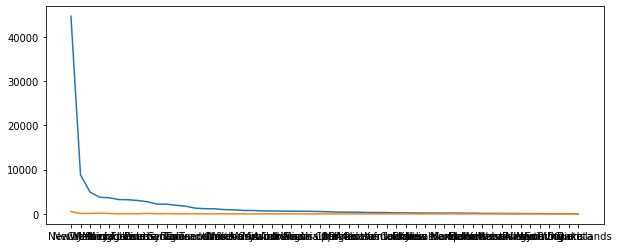

In [69]:
#let's try to plot the number of cases and number of deaths in March 27th for each state 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
cases = plt.plot(sorted27.state, sorted27.cases)
deaths = plt.plot(sorted27.state, sorted27.deaths)
plt.show()

# Task 2: 

1. What is this chart showing? Is this a good representation of the data? Why or why not? 
2. Can you think of other ways to display this infomration in a more meanigful way? 


The chart is showing the number of cases and deaths in each state of the United States. This is not a proper representation of the data because the function of a line graph is to display the trend of data points typically over a period of time. A change in the states affected is improper because there is no objective ranking of the states as opposed to time which is objectively ranked from t=0 (initial/start) to a value greater than zero such as t=1 ot t=2.

Thus, a more meaningful way to present this data is the use of a bar graph or a pie chart. In a bar graph, each state can two bars of data, one for the number of cases and another for number of deaths. If a pie chart was used, there can be two separate pie charts. One dedicated to the number of cases and another dedicated to the number of deaths. In each pie chart, we can view which states have a larger or smaller share of cases or deaths.



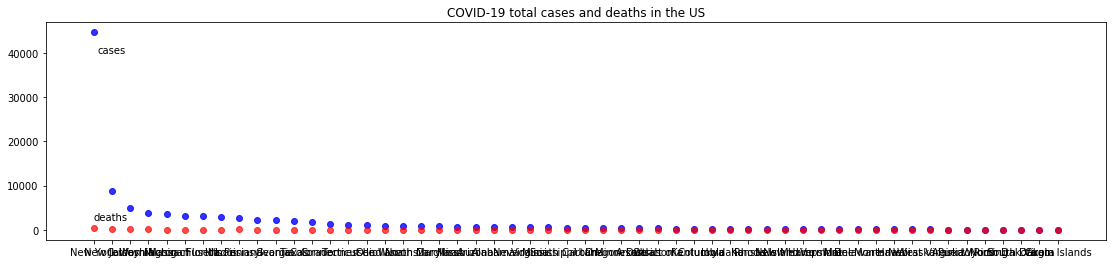

In [70]:
#to make this visualization better I will try to display the info in data points and not a continuous line.
#let's try to plot the number of cases and number of deaths in March 27th for each state 
#I will also change the chart size 
import matplotlib.pyplot as plt
plt.figure(figsize=(19,4))
#let's also change the colors of the dots so the cases are blue and the deaths are red
cases = plt.plot(sorted27.state, sorted27.cases, 'ro', c='b',alpha=0.8)
deaths = plt.plot(sorted27.state, sorted27.deaths, 'ro', alpha=0.7)

# We can add labels
plt.text(0.2,40000, 'cases')
plt.text(0.001,2200, 'deaths')

# and of course add title: 

plt.title('COVID-19 total cases and deaths in the US')
plt.show()

Alright, this is a little better! But still the states names are mostly not visible because there are too many of them! 

To highlight the gap betwen deaths and confirmed cases I will remove those states that have less than 10 cases: 


In [71]:
sorted27 = sorted27[sorted27['deaths']>20]

In [72]:
len(sorted27)

16

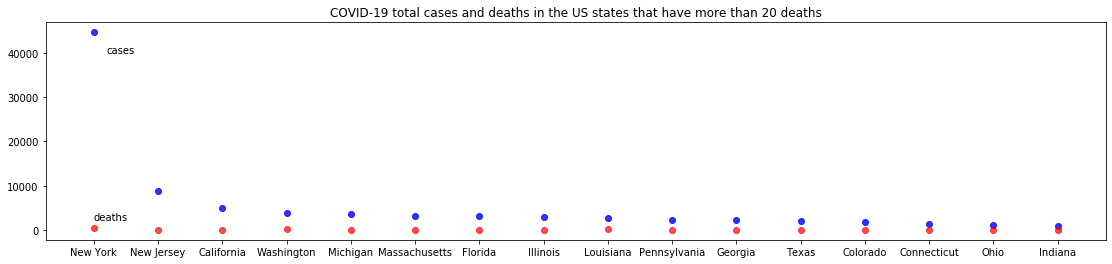

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,4))
#let's also change the colors of the dots so the cases are blue and the deaths are red
cases = plt.plot(sorted27.state, sorted27.cases, 'ro', c='b',alpha=0.8)
deaths = plt.plot(sorted27.state, sorted27.deaths, 'ro', alpha=0.7)

# We can add labels
plt.text(0.2,40000, 'cases')
plt.text(0.001,2200, 'deaths')

# and of course add title: 

plt.title('COVID-19 total cases and deaths in the US states that have more than 20 deaths')
plt.show()

## Task 3: Advanced:
For the March 27th DataFrame: 

As of March 27th, which are the top 5 states in terms of the highest ratio of deaths/total cases? 
Where is New York ranked? Can you guess why is it ranked that way (you can use media or any source to back your explanation). 

- Hint: work on the march27 df, and create a new column that calculates this ratio. Then sort the DF by the new column. 

In [100]:
#your code here:

total_deaths = []
#previous_death_count = 0
#previous_case_count = 0
for i in range(len(march27.state)):
    current_death_count = march27.deaths.iloc[i]
    current_case_count = march27.cases.iloc[i]
    #current_val = (current_death_count + previous_death_count)/(current_case_count + previous_case_count)
    current_val = (current_death_count/current_case_count)
    current_percent = current_val*100
    total_deaths.append(current_percent)
    #previous_death_count = current_death_count
    #previous_case_count = current_case_count
    
    
    
    
march27['percentage'] = total_deaths 



march27.head()


test = march27.sort_values('percentage')

#march27.head()

test.tail(5)


df2 = march27[march27["state"]== "New York"]










/Users/aberais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [99]:
# The top 5 states in terms of highest ratio of deaths/total cases is Georgia, Puerto Rico, Louisiana, Washington,
# Vermont. 

# New York is ranked #34 on the list of ratios of deaths/total cases per state.

# New York is ranked that way because the people who are afflicted in New York are treated much faster. 



In [108]:
test.tail(34)

,date,state,fips,cases,deaths,Precentage of total_deaths/total_cases,percentage
1368,2020-03-27,New York,36,44635,535,1.198611,1.198611
1342,2020-03-27,Delaware,10,165,2,1.212121,1.212121
1349,2020-03-27,Illinois,17,3029,37,1.221525,1.221525
1366,2020-03-27,New Jersey,34,8825,108,1.223796,1.223796
1351,2020-03-27,Iowa,19,235,3,1.276596,1.276596
1343,2020-03-27,District of Columbia,11,304,4,1.315789,1.315789
1361,2020-03-27,Missouri,29,671,9,1.341282,1.341282
1360,2020-03-27,Mississippi,28,579,8,1.381693,1.381693
1344,2020-03-27,Florida,12,3198,46,1.438399,1.438399
1370,2020-03-27,North Dakota,38,68,1,1.470588,1.470588


## - Submit your answers to these notebook 3 tasks on NYU Classes along with a URL to your Github based Jupyter Notebook. 